In [7]:
import pickle
import matplotlib.pyplot as plt

# Load example

# runs/train data folder path
data = "/zhome/19/d/137388/github/DeepLearning_PAINN/runs/train/20241118_1408/data.pickle"

with open(data, 'rb') as f:
    data = pickle.load(f)



In [8]:
# Plot settings
# Enable LaTeX type text
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=14)


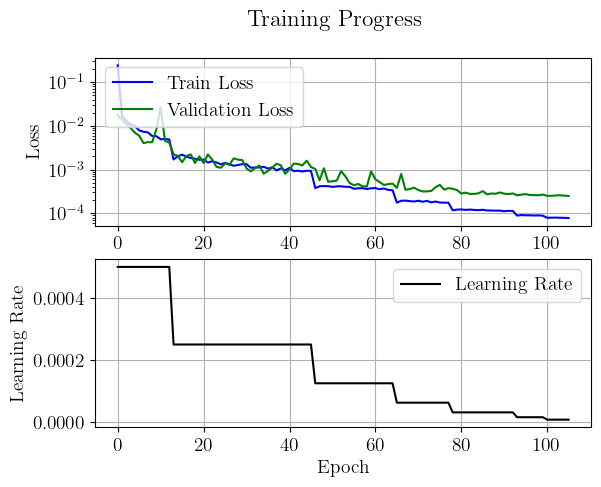

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot primary y-axis (losses) on the first subplot
ax1.semilogy(data['epoch'], data['train_loss'], label='Train Loss', color='b')
ax1.semilogy(data['epoch'], data['val_loss'], label='Validation Loss', color='g')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')  # Legend for the first y-axis
ax1.grid(True)

# Plot secondary y-axis (learning rate) on the second subplot
ax2.plot(data['epoch'], data['lr'], 'k-', label='Learning Rate')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Learning Rate', color='k')
ax2.tick_params(axis='y', labelcolor='k')
ax2.legend(loc='upper right')  # Combine legends
ax2.grid(True)

plt.suptitle('Training Progress')
plt.show()

